In [ ]:
import time
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

### 1. Data Preparation

In [ ]:
input_path = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input
)

batch_size = 128
train_set = train_datagen.flow_from_directory(
    input_path + 'train',                                          
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(224,224)
)

validation_set = validation_datagen.flow_from_directory(
    input_path + 'valid',
    shuffle=False,
    batch_size=batch_size,
    class_mode='categorical',
    target_size=(224,224)
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.



### 2. Model Preparation

In [ ]:
base_model=VGG16(weights='imagenet', include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(38,activation='softmax'))
model.summary()

model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

58892288/58889256 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 38)                953382    
Total params: 15,668,070
Trainable params: 953,382
Non-trainable params: 14,714,688
_________________________________________________________________


### 3. Model Training

In [ ]:
train_num = train_set.samples
valid_num = validation_set.samples

In [ ]:
t=time.time()
history = model.fit_generator(train_set,
                              steps_per_epoch=train_num//batch_size,
                              validation_data=validation_set,
                              epochs=5,
                              validation_steps=valid_num//batch_size
)
print('Training time: %s' % (t - time.time()))

Train for 549 steps, validate for 137 steps
Epoch 1/5
549/549 [==============================] - 1340s 2s/step - loss: 0.6501 - accuracy: 0.8062 - val_loss: 0.2596 - val_accuracy: 0.9166
Epoch 2/5
549/549 [==============================] - 1147s 2s/step - loss: 0.3405 - accuracy: 0.8892 - val_loss: 0.2249 - val_accuracy: 0.9267
Epoch 3/5
549/549 [==============================] - 1142s 2s/step - loss: 0.2867 - accuracy: 0.9078 - val_loss: 0.2037 - val_accuracy: 0.9332
Epoch 4/5
549/549 [==============================] - 1151s 2s/step - loss: 0.2761 - accuracy: 0.9125 - val_loss: 0.1941 - val_accuracy: 0.9392
Epoch 5/5
549/549 [==============================] - 1166s 2s/step - loss: 0.2675 - accuracy: 0.9164 - val_loss: 0.2589 - val_accuracy: 0.9238
Training time: -5949.31986117363


### 4. Visualizing the Accuracy

In [ ]:
class_dict = train_set.class_indices
print(class_dict)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [ ]:
li = list(class_dict.keys())
print(li)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

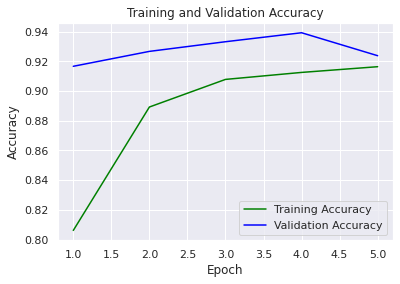

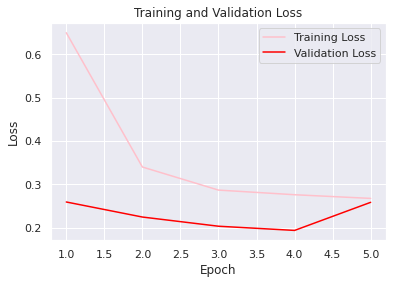

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 5. Test the Model

Following is our prediction:


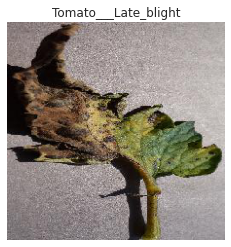

In [ ]:
image_path = "../input/new-plant-diseases-dataset/test/test/TomatoEarlyBlight1.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

### 6. Save Model

In [ ]:
filepath="Mymodel.h5"
model.save(filepath)

In [ ]:
import os
from IPython.display import FileLink
os.chdir(r'/kaggle/working')
FileLink(r'Mymodel.h5')

/kaggle/working/Mymodel.h5